# Metropolis sampling

In this notebook we analyse the results from VMC calculations on a spherical harmonic oscillator using brute force Metropolis.

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tqdm

from vmc.interface import PyHarmonicOscillator, PyMetropolisAlgorithm, \
    PySimpleGaussian, PySimpleGaussianNumerical

We use natural units with $m = \hbar = c = 1$. We also restrict our views to $\omega = 1$ in this analysis.

In [20]:
mass = 1.0
omega = 1.0

In [21]:
spread = 1.0
step_length = 0.05

## The one dimensional spherical harmonic oscillator

Starting with the simplest case we look at the one dimensional spherical harmonic oscillator.

\begin{align}
    \Psi_T(\mathbf{x}) &= \prod_{i = 1}^N\exp(-\alpha x_i).
\end{align}

We wish to compare the CPU time of the analytical scheme, i.e., an analytical expression for the Laplcian and hence the local energy, versus a central difference scheme of second order.

We know that the exact ground state energy for the one dimensional spherical harmonic oscillator can be found at $\alpha = 0.5$. By restricting our view to the region $\alpha \in [0.1, 0.7]$ we should observe a trend where the average energy goes towards a minimum at $\alpha = 0.5$ and increases on both sides.

In [15]:
alpha_min = 0.1
alpha_max = 0.7
num_alphas = 16

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

In [48]:
num_particles = 2
num_dimensions = 1
num_parameters = 1

num_samples = 1000000

In [49]:
solver = PyMetropolisAlgorithm(num_particles)
wavefunction_analytical = PySimpleGaussian(
    num_particles, num_dimensions, num_parameters, mass, omega, spread=spread)
wavefunction_approximate = PySimpleGaussianNumerical(
    num_particles, num_dimensions, num_parameters, mass, omega, spread=spread)
hamiltonian = PyHarmonicOscillator(mass, omega)

In [50]:
energies_analytical = np.zeros(num_alphas)
energies_approximate = np.zeros(num_alphas)

for i in tqdm.tqdm(range(num_alphas)):
    wavefunction_analytical.set_parameters(alphas[i])
    wavefunction_approximate.set_parameters(alphas[i])

    energies_analytical[i] = solver.run(
        wavefunction_analytical, hamiltonian, step_length, num_samples)
    energies_approximate[i] = solver.run(
        wavefunction_approximate, hamiltonian, step_length, num_samples)

    wavefunction_analytical.redistribute()
    wavefunction_approximate.redistribute()

energies_analytical /= num_samples
energies_approximate /= num_samples

100%|██████████| 16/16 [00:06<00:00,  2.57it/s]


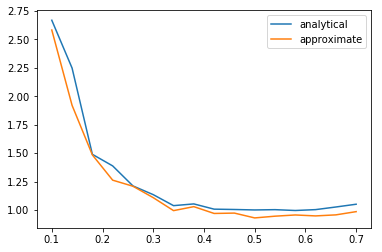

In [51]:
plt.plot(alphas.ravel(), energies_analytical, label="analytical")
plt.plot(alphas.ravel(), energies_approximate, label="approximate")
plt.legend(loc="best")
plt.show()